In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

Creating Data

In [2]:
train_samples = []
train_labels = []

In [3]:
for i in range(50):
  #5% of young people who have side effects
  random_young = randint(13,64)
  train_samples.append(random_young)
  train_labels.append(1)

  #5% of old people who do NOT have side effects
  random_old = randint(65,100)
  train_samples.append(random_old)
  train_labels.append(0)

for i in range(1000):
  #95% of young people who do NOT have side effects
  random_young = randint(13,64)
  train_samples.append(random_young)
  train_labels.append(0)

  #95% of old people who have side effects
  random_old = randint(65,100)
  train_samples.append(random_old)
  train_labels.append(1)

Converting to a Numpy Array and Shuffling the dataset

In [4]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_samples, train_labels = shuffle(train_samples, train_labels)

Converting the ages from (13 to 100) to between (0 and 1)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

Modelling - Sequential

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [7]:
model = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fitting Model and Evaluating on 10% Validation dataset

In [10]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 4s - loss: 0.5405 - accuracy: 0.7291 - val_loss: 0.4299 - val_accuracy: 0.8762
Epoch 2/30
1890/1890 - 1s - loss: 0.3481 - accuracy: 0.9042 - val_loss: 0.2910 - val_accuracy: 0.9286
Epoch 3/30
1890/1890 - 1s - loss: 0.2749 - accuracy: 0.9344 - val_loss: 0.2475 - val_accuracy: 0.9619
Epoch 4/30
1890/1890 - 1s - loss: 0.2585 - accuracy: 0.9376 - val_loss: 0.2358 - val_accuracy: 0.9619
Epoch 5/30
1890/1890 - 1s - loss: 0.2507 - accuracy: 0.9354 - val_loss: 0.2323 - val_accuracy: 0.9524
Epoch 6/30
1890/1890 - 1s - loss: 0.2464 - accuracy: 0.9402 - val_loss: 0.2287 - val_accuracy: 0.9524
Epoch 7/30
1890/1890 - 1s - loss: 0.2454 - accuracy: 0.9402 - val_loss: 0.2238 - val_accuracy: 0.9476
Epoch 8/30
1890/1890 - 1s - loss: 0.2422 - accuracy: 0.9429 - val_loss: 0.2282 - val_accuracy: 0.9429
Epoch 9/30
1890/1890 - 1s - loss: 0.2410 - accuracy: 0.9392 - val_loss: 0.2207 - val_accuracy: 0.9524
Epoch 10/30
1890/1890 - 1s - loss: 

Creating Test data

In [11]:
test_samples=[]
test_labels=[]

In [12]:
for i in range(10):
  #5% of young people who have side effects
  random_young = randint(13,64)
  test_samples.append(random_young)
  test_labels.append(1)

  #5% of old people who do NOT have side effects
  random_old = randint(65,100)
  test_samples.append(random_old)
  test_labels.append(0)

for i in range(200):
  #95% of young people who do NOT have side effects
  random_young = randint(13,64)
  test_samples.append(random_young)
  test_labels.append(0)

  #95% of old people who have side effects
  random_old = randint(65,100)
  test_samples.append(random_old)
  test_labels.append(1)

In [13]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

Predictions

In [15]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [16]:
for i in predictions:
  print(i)

[0.0398035 0.9601965]
[0.46882677 0.5311733 ]
[0.96368885 0.03631113]
[0.00687744 0.9931225 ]
[0.02876984 0.97123015]
[0.9707949  0.02920507]
[0.9595015  0.04049853]
[0.94292694 0.05707302]
[0.93459755 0.0654025 ]
[0.9709126  0.02908746]
[0.01196634 0.98803365]
[0.46882677 0.5311733 ]
[0.09226266 0.9077374 ]
[0.9714296  0.02857042]
[0.21596141 0.7840386 ]
[0.00768469 0.9923153 ]
[0.97126263 0.02873736]
[0.032065 0.967935]
[0.02313886 0.9768611 ]
[0.06769544 0.93230456]
[0.01336288 0.9866371 ]
[0.9173818 0.0826182]
[0.10209074 0.8979093 ]
[0.15112904 0.848871  ]
[0.03573305 0.9642669 ]
[0.0398035 0.9601965]
[0.00959175 0.99040824]
[0.13730204 0.86269796]
[0.16608046 0.8339195 ]
[0.9616501  0.03834999]
[0.9707949  0.02920507]
[0.0166554 0.9833446]
[0.97126263 0.02873736]
[0.04431632 0.95568365]
[0.97140765 0.02859241]
[0.00959175 0.99040824]
[0.9709126  0.02908746]
[0.9698075  0.03019243]
[0.01071417 0.9892859 ]
[0.032065 0.967935]
[0.9710297 0.0289703]
[0.04431632 0.95568365]
[0.1821934

In [17]:
rounded_predictions = np.argmax(predictions, axis=-1)

Confusion Matrix

In [18]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [19]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [20]:
#Function from scikit documentation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


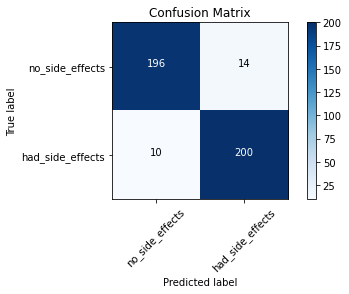

In [21]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion Matrix')

Saving and Loading model

In [32]:
import os.path
if os.path.isfile("/Users/jacobimmanuel/Medical Side Effects/medical_trial_model.h5") is False:
    model.save("/Users/jacobimmanuel/Medical Side Effects/medical_trial_model.h5")

In [33]:
from tensorflow.keras.models import load_model
new_model = load_model("/Users/jacobimmanuel/Medical Side Effects/medical_trial_model.h5")

In [34]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
new_model.get_weights()

[array([[-0.13678655, -0.28300148, -0.04486388, -0.2229189 ,  0.68408406,
         -0.2938895 ,  0.6943243 , -0.4495879 ,  0.56991833, -0.569032  ,
         -0.30184326,  0.40710297,  0.48397583,  0.08567038,  0.5840691 ,
         -0.52744627]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        , -0.20467858,
         0.        , -0.15294987,  0.        , -0.2834489 ,  0.        ,
         0.        , -0.07049107, -0.24439235,  0.1777103 , -0.28024164,
         0.        ], dtype=float32),
 array([[-3.00561637e-01, -1.03935599e-03, -3.07145417e-01,
          1.84576362e-01, -1.87329173e-01,  3.30789179e-01,
         -1.71121255e-01,  2.63544172e-01, -3.35213602e-01,
         -1.01671249e-01, -2.03827918e-02, -2.87291646e-01,
          3.11396688e-01,  2.30097860e-01,  2.47347385e-01,
         -2.76070714e-01,  5.40912151e-03, -4.58611548e-02,
          4.61562872e-02,  1.48041546e-02,  7.63427913e-02,
         -2.51014471e-01,  2.34369010e-01, -2.70377100e-02,
 

In [36]:
new_model.optimizer

In [37]:
model.optimizer

In [39]:
%pwd #Check current directory

'/Users/jacobimmanuel/Medical Side Effects'

In [38]:
%cd "/Users/jacobimmanuel/Medical Side Effects/" #change directory

/Users/jacobimmanuel/Medical Side Effects
